# Project1

## Step 1
Dependencies and Setup

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from scipy.stats import linregress

# from api_keys import geoapify_key

In [71]:
# Load the CSV file
df=pd.read_csv("./Resources/Kaggle/Student Loan Debt by School 2020-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  21370 non-null  int64  
 1   OPE ID                 21370 non-null  int64  
 2   School                 21370 non-null  object 
 3   City                   16825 non-null  object 
 4   State                  20350 non-null  object 
 5   Zip Code               16825 non-null  float64
 6   School Type            21370 non-null  object 
 7   Loan Type              21370 non-null  object 
 8   Recipients             21370 non-null  int64  
 9   # of Loans Originated  21370 non-null  int64  
 10  $ of Loans Originated  21370 non-null  int64  
 11  # of Disbursements     21370 non-null  int64  
 12  $ of Disbursements     21370 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.1+ MB


In [72]:
# Change data type and rename columns
df['Zip Code'] = df['Zip Code'].fillna(-1).astype(int).astype(str).replace('-1', 'NaN')
df['Recipients'] = df['Recipients'].astype(int)
df['# of Loans Originated'] = df['# of Loans Originated'].astype(int)
df['# of Disbursements'] = df['# of Disbursements'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  21370 non-null  int64 
 1   OPE ID                 21370 non-null  int64 
 2   School                 21370 non-null  object
 3   City                   16825 non-null  object
 4   State                  20350 non-null  object
 5   Zip Code               21370 non-null  object
 6   School Type            21370 non-null  object
 7   Loan Type              21370 non-null  object
 8   Recipients             21370 non-null  int32 
 9   # of Loans Originated  21370 non-null  int32 
 10  $ of Loans Originated  21370 non-null  int64 
 11  # of Disbursements     21370 non-null  int32 
 12  $ of Disbursements     21370 non-null  int64 
dtypes: int32(3), int64(4), object(6)
memory usage: 1.9+ MB


In [73]:
df.head(10)

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,0,1051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487,Public,Subsidized,7594,7622,33040862,7622,16774054
1,1,1052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294,Public,Subsidized,4272,4352,18590061,4352,9058344
2,2,1009,AUBURN UNIVERSITY,AUBURN,AL,36849,Public,Subsidized,4504,4504,19474542,4535,10142490
3,3,1057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688,Public,Subsidized,3438,3487,15061071,3487,7557853
4,4,1047,TROY UNIVERSITY,TROY,AL,36082,Public,Subsidized,4334,4355,18467508,4355,7395839
5,5,1036,SAMFORD UNIVERSITY,BIRMINGHAM,AL,35229,Private-Nonprofit,Subsidized,638,638,2725011,638,1412105
6,6,1024,UNIVERSITY OF WEST ALABAMA,LIVINGSTON,AL,35470,Public,Subsidized,1085,1098,4552993,1098,2306439
7,7,42267,ALABAMA COLLEGE OF OSTEOPATHIC MEDICINE,DOTHAN,AL,36303,Private-Nonprofit,Subsidized,0,0,0,0,0
8,8,1020,JACKSONVILLE STATE UNIVERSITY,JACKSONVILLE,AL,36265,Public,Subsidized,2894,2895,12057276,2895,6150665
9,9,1050,TUSKEGEE UNIVERSITY,TUSKEGEE,AL,36088,Private-Nonprofit,Subsidized,1104,1107,4957913,1108,2482547


In [74]:
df.describe()

,index,OPE ID,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
count,21370.000000,21370.000000,21370.000000,21370.000000,2.137000e+04,21370.000000,2.137000e+04
mean,10684.500000,16201.447824,327.571221,336.351006,2.552457e+06,341.877679,1.278388e+06
std,6169.131962,15479.675287,1026.847813,1057.889512,8.464158e+06,1078.516745,4.298032e+06
min,0.000000,1002.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,5342.250000,2848.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,10684.500000,8447.500000,10.000000,10.000000,5.841800e+04,10.000000,2.873850e+04
75%,16026.750000,30837.000000,188.750000,192.000000,1.430073e+06,197.000000,7.090422e+05
max,21369.000000,42933.000000,26663.000000,27261.000000,2.586015e+08,27261.000000,1.085654e+08


## Step 2
### Ask the questions

State, What is the breakdown of number of collages in each state? P

State, What is the breakdown of recipients of Student Loans by State (by quantity and by $)?P

State, What states have the most (public schools? Private schools?) recipients?P

State, What are the top 10 states with the most student loans?L

Geographic, How does the average student loan vary by zip code?M

Geographic, Are there trends based on geographic region or type of school?T

Loan Type, What is the breakdown of type of student loan  (subsidized, unsubsidized, grad plus, parent plus, etc.)?M

In [75]:
df.columns

Index(['index', 'OPE ID', 'School', 'City', 'State', 'Zip Code', 'School Type',
       'Loan Type', 'Recipients', '# of Loans Originated',
       '$ of Loans Originated', '# of Disbursements', '$ of Disbursements'],
      dtype='object')

In [88]:
loan_names = df["Loan Type"].value_counts()
loan_names

Subsidized                      4274
Unsubsidized - Undergraduate    4274
Unsubsidized - Graduate         4274
Parent Plus                     4274
Grad Plus                       4274
Name: Loan Type, dtype: int64

In [89]:
loan_type = df.groupby("Loan Type")[["Recipients", "# of Disbursements", "$ of Disbursements"]].sum()


def format_with_commas(x):
    if isinstance(x, (int, float)):
        return "{:,.0f}".format(x)
    return x

#loan_type['Recipients'] = loan_type['Recipients'].apply(format_with_commas)

#loan_type['# of Disbursements'] = loan_type['# of Disbursements'].apply(format_with_commas)

#loan_type['$ of Disbursements'] = loan_type['$ of Disbursements'].apply(format_with_commas)

loan_type

#loan_type_amounts = df.groupby('Loan Type')['# of Disbursements'].sum()
#loan_type_amounts

,Recipients,# of Disbursements,$ of Disbursements
Loan Type,,,
Grad Plus,290765,312189,3751925629
Parent Plus,420715,432083,3819328361
Subsidized,2607417,2677884,5335392322
Unsubsidized - Graduate,909824,970234,8649219445
Unsubsidized - Undergraduate,2771476,2913536,5763289607


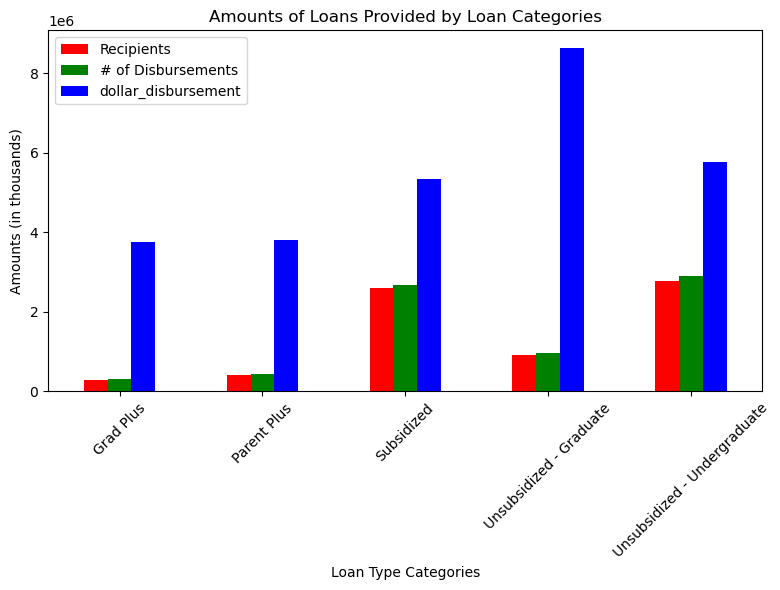

In [106]:
import matplotlib.pyplot as plt

# Assuming df is already prepared
df['dollar_disbursement'] = df["$ of Disbursements"] / 1_000  # Convert to millions for plotting
loan_type = df.groupby("Loan Type")[["Recipients", "# of Disbursements", "dollar_disbursement"]].sum()

ax = loan_type.plot(kind="bar", color=["red", "green", "blue"], figsize=(8,6))

plt.xlabel("Loan Type Categories")
plt.ylabel("Amounts (in thousands)") 
plt.title("Amounts of Loans Provided by Loan Categories")

# # Adjust y-ticks
# ax.set_yticklabels([int(val) for val in ax.get_yticks()])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\mdrco\AppData\Local\Temp\ipykernel_19180\531666507.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_values)


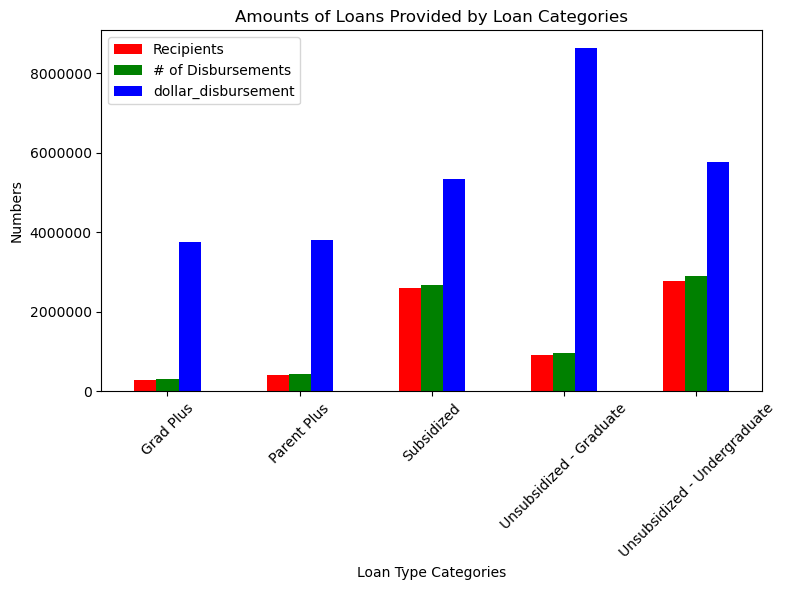

In [101]:

df['dollar_disbursement'] = df["$ of Disbursements"] / 1000
loan_type = df.groupby("Loan Type")[["Recipients", "# of Disbursements", "dollar_disbursement"]].sum()
#x_axis = np.arange(len())
tick_locations = [value for value in x_axis]


ax = loan_type.plot(kind="bar",color=["red", "green", "blue"], figsize=(8,6))

plt.xlabel("Loan Type Categories")
plt.ylabel("Numbers")
plt.title("Amounts of Loans Provided by Loan Categories")
plt.ticklabel_format(useOffset=False, style="plain", axis="y")

y_values = [int(label) for label in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_values)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  21370 non-null  int64 
 1   OPE ID                 21370 non-null  int64 
 2   School                 21370 non-null  object
 3   City                   16825 non-null  object
 4   State                  20350 non-null  object
 5   Zip Code               21370 non-null  object
 6   School Type            21370 non-null  object
 7   Loan Type              21370 non-null  object
 8   Recipients             21370 non-null  int32 
 9   # of Loans Originated  21370 non-null  int32 
 10  $ of Loans Originated  21370 non-null  int64 
 11  # of Disbursements     21370 non-null  int32 
 12  $ of Disbursements     21370 non-null  int64 
dtypes: int32(3), int64(4), object(6)
memory usage: 1.9+ MB


In [ ]:
#Determine the average amount of loans per Loan Tyoe
loan_type_avg = df.groupby("Loan Type")["# of Disbursements", "$ of Disbursements"].mean()

loan_type_avg

C:\Users\mdrco\AppData\Local\Temp\ipykernel_19180\264473623.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loan_type_avg = df.groupby("Loan Type")["# of Disbursements", "$ of Disbursements"].mean()


,# of Disbursements,$ of Disbursements
Loan Type,,
Grad Plus,73.043753,8.778488e+05
Parent Plus,101.095695,8.936192e+05
Subsidized,626.552176,1.248337e+06
Unsubsidized - Graduate,227.008423,2.023683e+06
Unsubsidized - Undergraduate,681.688348,1.348453e+06


School Type, What is the breakdown of student loan quantity/$ by school type (for profit, non-profit, public, etc.)?L

<!-- VS, What is the breakdown in disbursements versus loan origination $ amounts? -->

<!-- VS, Which schools have the highest disparity between loans originated and loans disbursed? -->

API, Foreign university, VS US

More datasets